In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
import os 
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80

Identify current directory and change directory to the directory where train and test data is present

In [72]:
os.getcwd()

'C:\\Users\\pedne\\Python\\Competition\\loan'

In [73]:
os.chdir('C:\\Users\\pedne\\Python\\Competition\\loan')

Load train, test and submission file

In [74]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [75]:
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(data.shape, test.shape))

Train dataset shape: (614, 13), 
Test dataset shape: (367, 12)


First look at data

In [76]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
538,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66.0,360.0,1.0,Rural,N
549,LP002777,Male,Yes,0,Graduate,No,2785,2016.0,110.0,360.0,1.0,Rural,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
163,LP001570,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural,Y
286,LP001925,Female,No,0,Graduate,Yes,2600,1717.0,99.0,300.0,1.0,Semiurban,N


Prepare submission file for final submission

In [77]:
submission = pd.DataFrame()
submission['Loan_ID'] = test['Loan_ID']

Dropping unwanted columns - Loan_ID

In [78]:
data.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['Loan_ID'],axis=1,inplace=True)

Check distribution of target variable

In [79]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Convert target variable to integer

In [80]:
data['Loan_Status'] = data['Loan_Status'].map({'N':0,'Y':1})

Identify data types of train data

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


Identify missing values in train and test datasets 

In [82]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Exploratory Data Analysis (EDA) Starts

<AxesSubplot:xlabel='Dependents', ylabel='count'>

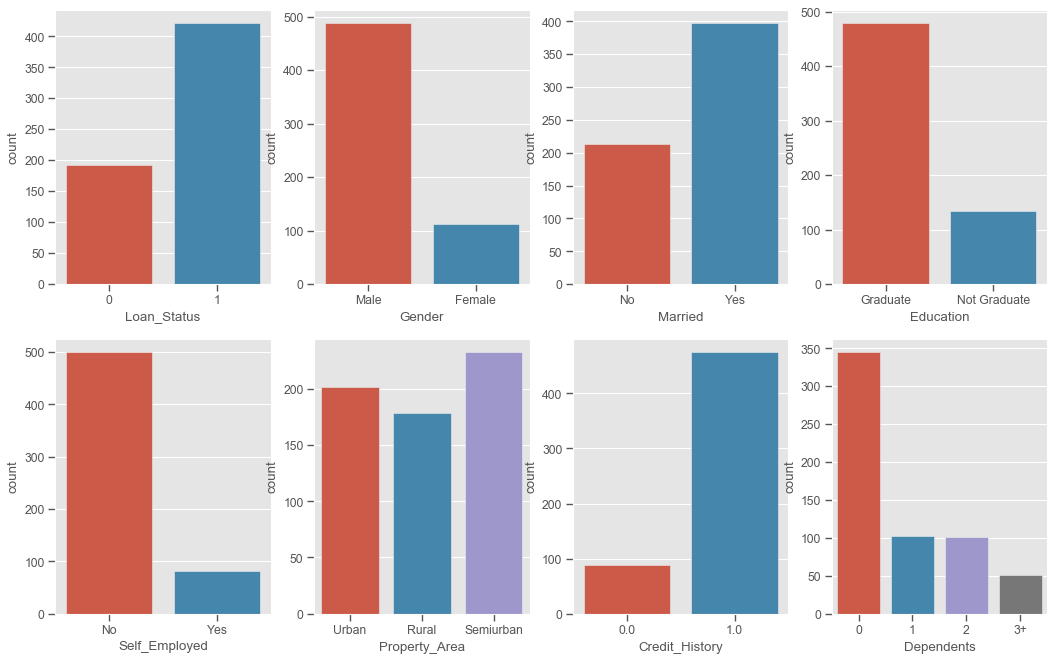

In [84]:
#Univariate Analysis
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=data,ax=ax[0][0])
sns.countplot('Gender',data=data,ax=ax[0][1])
sns.countplot('Married',data=data,ax=ax[0][2])
sns.countplot('Education',data=data,ax=ax[0][3])
sns.countplot('Self_Employed',data=data,ax=ax[1][0])
sns.countplot('Property_Area',data=data,ax=ax[1][1])
sns.countplot('Credit_History',data=data,ax=ax[1][2])
sns.countplot('Dependents',data=data,ax=ax[1][3])

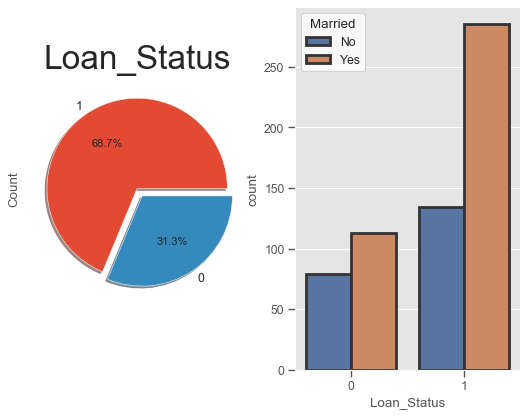

In [85]:
# Explore variable 'Married' with target variable - 'Loan_Status'

f,ax=plt.subplots(1,2,figsize=(8,6))
data['Loan_Status'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Loan_Status',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Loan_Status',hue='Married',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

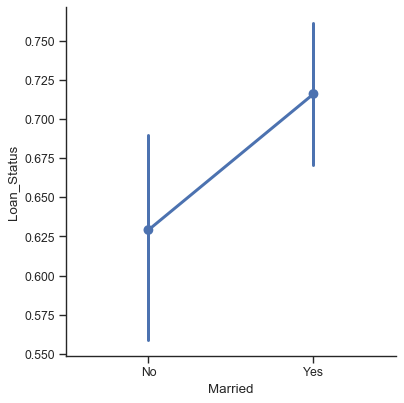

In [86]:
#Catplot - 'Married' Vs 'Loan_Status' 
sns.catplot(x='Married',y='Loan_Status',kind='point',data=data)

If you are married, then chances of getting loan approved are more (71.8%) than if you are not married (62.9%).

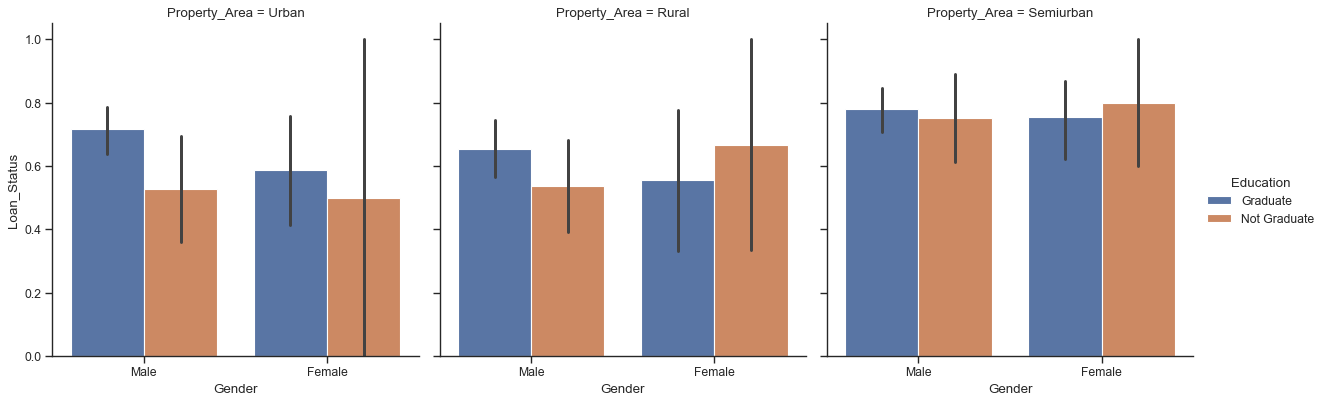

In [87]:
#Catplot - 'Gender' Vs 'Loan_Status' with hue='Education' and columns = 'Property_Area'
sns.catplot(x='Gender',y='Loan_Status',kind='bar',data=data,col='Property_Area',hue='Education')

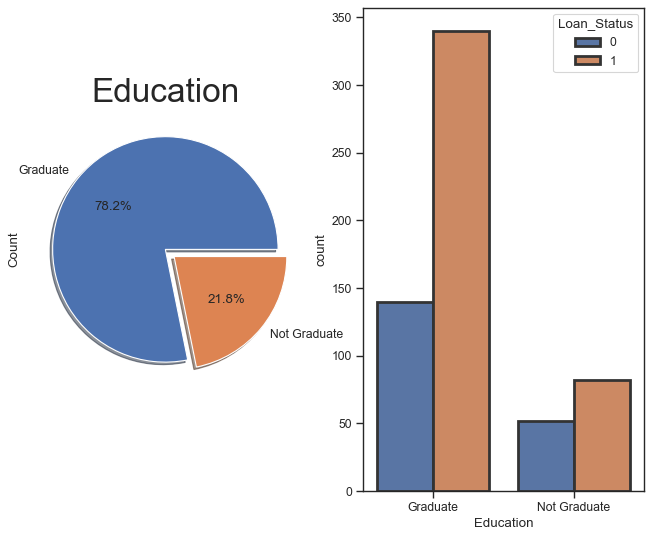

In [88]:
# Variable - 'Education' Vs 'Loan_Status'
f,ax=plt.subplots(1,2,figsize=(10,8))
data['Education'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Education',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Education',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

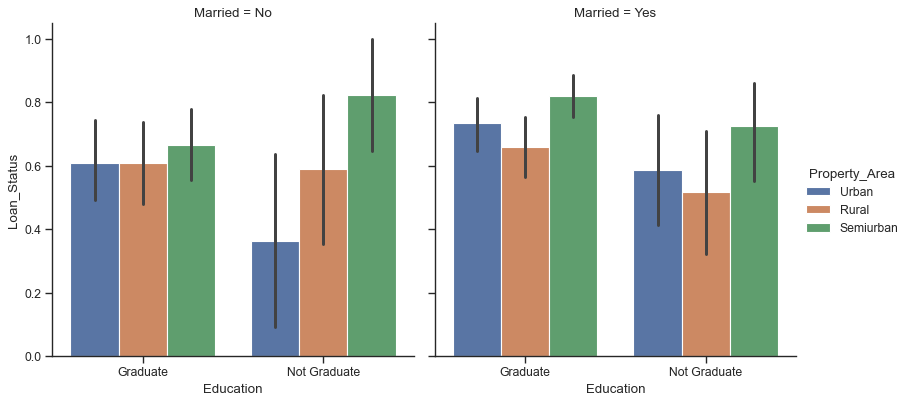

In [89]:
#Catplot - 'Education' Vs 'Loan_Status'
sns.catplot(x='Education',y='Loan_Status',kind='bar',data=data,col='Married',hue='Property_Area')

If you are in urban+Not graduate+not married = Loan approval is less

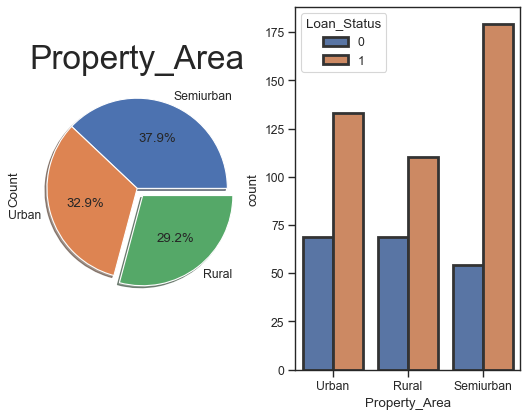

In [90]:
# Variable - 'Property_Area' Vs 'Loan_Status'
f,ax=plt.subplots(1,2,figsize=(8,6))
data['Property_Area'].value_counts().plot.pie(ax=ax[0],explode=[0,0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Property_Area',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Property_Area',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

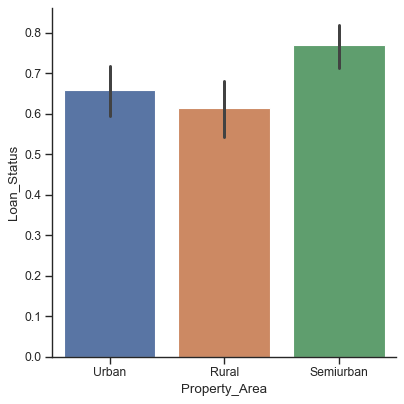

In [91]:
#Catplot - 'Property_Area' Vs 'Loan_Status'
sns.catplot(x='Property_Area',y='Loan_Status',kind='bar',data=data)

If you are in semiurban, then chances of getting loan approved are more (76.8%) than
if you are in urban(65.8%) & Rural (61.5%)

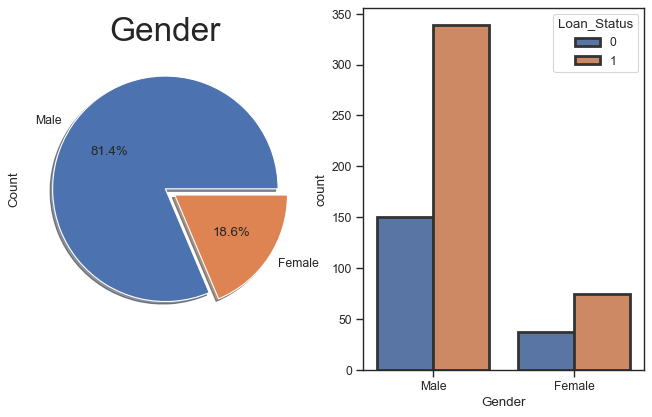

In [92]:
# Variable - 'Gender'  Vs 'Loan_Status'
f,ax=plt.subplots(1,2,figsize=(10,6))
data['Gender'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Gender',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Gender',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

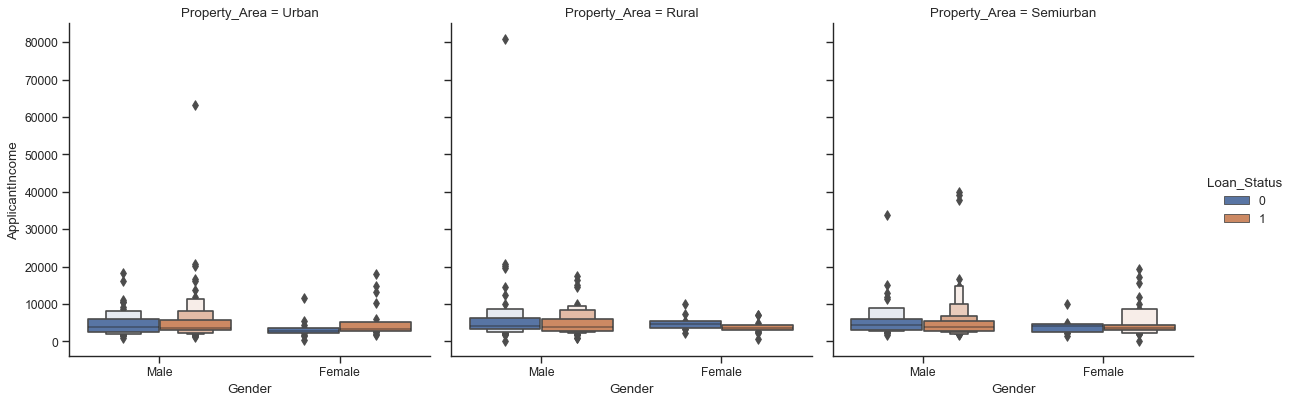

In [93]:
# Variable - 'Gender'  Vs 'ApplicantIncome' & hue = Loan_Status, col = Proprty_Area
sns.catplot(x='Gender',y='ApplicantIncome',data=data,kind='boxen',hue='Loan_Status', col='Property_Area')

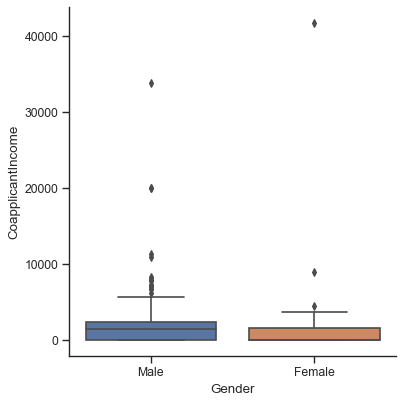

In [94]:
# Variable - 'Gender'  Vs 'CoapplicantIncome'
sns.catplot(x='Gender',y='CoapplicantIncome',data=data,kind='box')

Mean CoapplicantIncome of male slightly higer than Females.

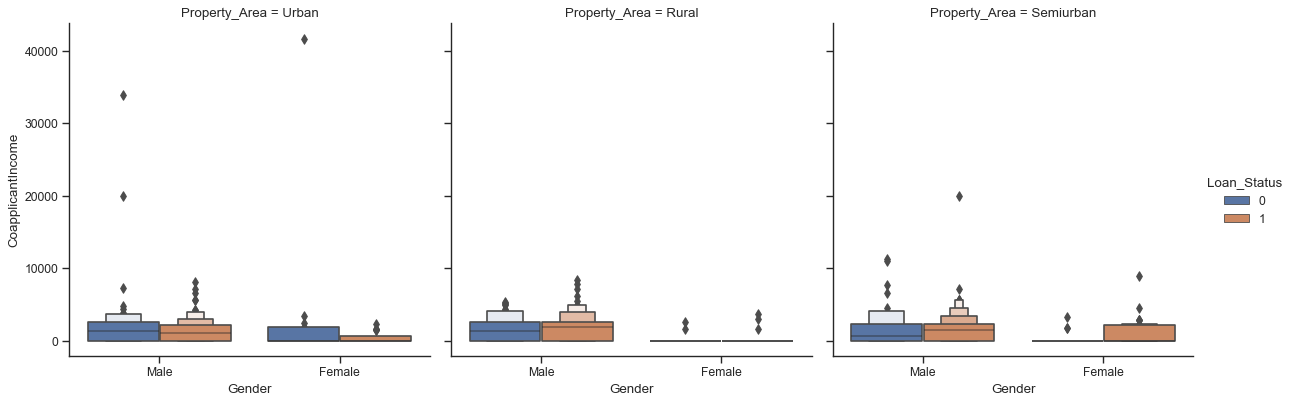

In [95]:
# Variable - 'Gender'  Vs 'CoapplicantIncome' with hue=Loan_Status and col=Property_Area
sns.catplot(x='Gender',y='CoapplicantIncome',data=data,kind='boxen',hue='Loan_Status', col='Property_Area')

Male have higher co-applicant income than female in all three property areas

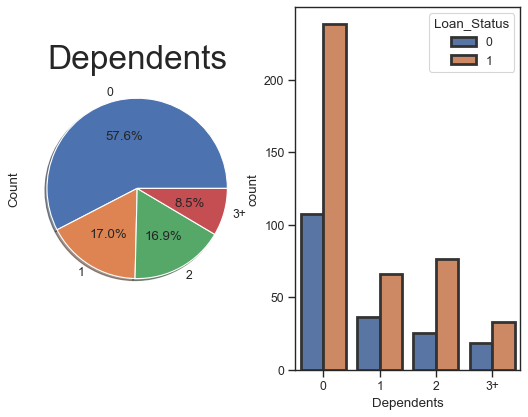

In [96]:
# Variable - 'Dependents' Vs 'Loan_Status'
f,ax=plt.subplots(1,2,figsize=(8,6))
data['Dependents'].value_counts().plot.pie(ax=ax[0],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Dependents',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Dependents',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

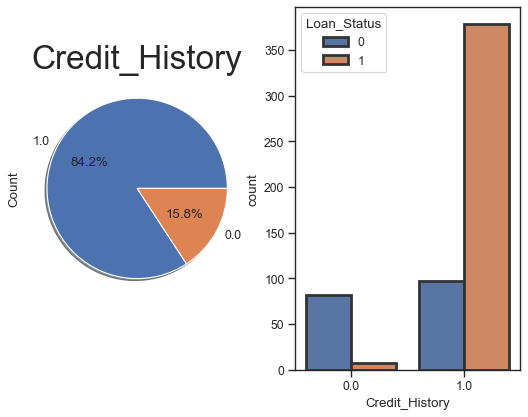

In [97]:
# Variable - 'Credit_History' Vs 'Loan_Status'
f,ax=plt.subplots(1,2,figsize=(8,6))
data['Credit_History'].value_counts().plot.pie(ax=ax[0],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Credit_History',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Credit_History',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

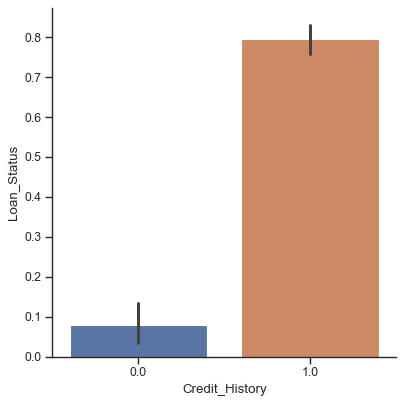

In [98]:
# Variable - 'Credit_History' Vs 'Loan_Status'
sns.catplot(x='Credit_History',y='Loan_Status',kind='bar',data=data)

If credit history is 1 then high chances (79.6%) of getting loan approved than 7.9% for credit history = 0

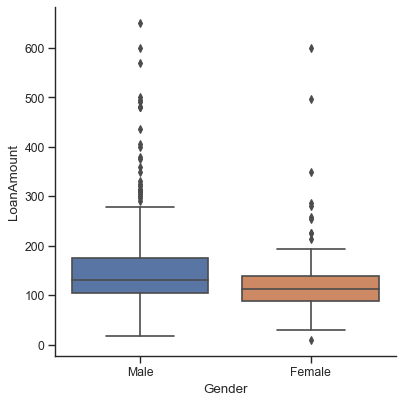

In [99]:
# Variable - 'Gender' Vs 'LoanAmount'
sns.catplot(x='Gender',y='LoanAmount',data=data,kind='box')

Mean LoanAmount of male slightly higer than Females.

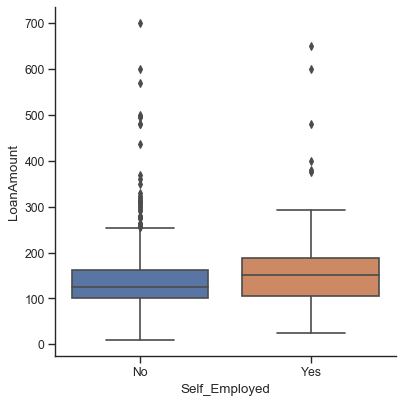

In [100]:
# Variable - 'Self_Employed' Vs 'LoanAmount'
sns.catplot(x='Self_Employed',y='LoanAmount',data=data,kind='box')

If you are self employed then loan amount is higher

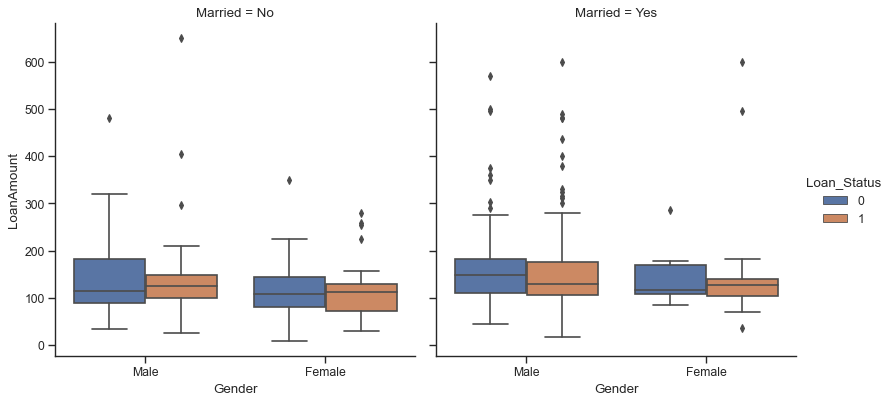

In [101]:
# Variable - 'Gender' Vs 'LoanAmount', hue='Loan_Status', col='Married'
sns.catplot(x='Gender',y='LoanAmount',data=data,kind='box',hue='Loan_Status', col='Married')

If you are married then loan amount is slightly higher then non-married

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

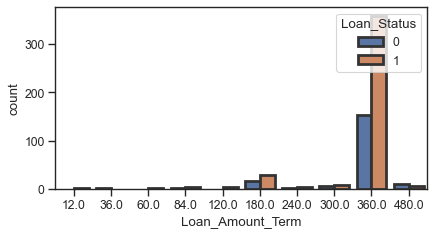

In [102]:
# Variable - 'Loan_Amount_Term' Vs 'Loan_Status'
sns.countplot('Loan_Amount_Term',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=data)

Maximum customers went for 360 months

Lets start Imputing missing values

Column - Married. 
Fill Null values with mode of Married column

In [103]:
data['Married'].value_counts().index[0]
data['Married'].fillna(data['Married'].value_counts().index[0], inplace=True)
test['Married'].fillna(test['Married'].value_counts().index[0], inplace=True)

Column - Dependents

In [104]:
# If loan status is 1 then, dependent = 2 else dependent=1
data.loc[(data.Dependents.isnull())&(data.Loan_Status==1),'Dependents'] = '2'
data.loc[(data.Dependents.isnull()),'Dependents'] = '1'

In [105]:
# If Credit_History is 1 then, dependent = 2 else dependent=1 for test
test.loc[(test.Dependents.isnull())&(test.Credit_History==1),'Dependents'] = '2'
test.loc[(test.Dependents.isnull()),'Dependents'] = '1'

Column  - Credit_History

In [106]:
# If loan status is 1 then, Credit_History = 1 else Credit_History=0
data.loc[(data.Credit_History.isnull())&(data.Loan_Status==1),'Credit_History'] = 1
data.loc[(data.Credit_History.isnull()),'Credit_History'] = 0

# Fill Null values with mode of Credit_History column for test
test['Credit_History'].fillna(test['Credit_History'].value_counts().index[0], inplace=True)
#In test data, for the user with income = 2733, it was decided to impute credit history as 0 based upon the Income to loan ratio 
test.loc[(test.ApplicantIncome == 2733),'Credit_History']  = 0

Column - Gender

In [107]:
# Fill Null values with mode of Gender column
data['Gender'].fillna(data['Gender'].value_counts().index[0], inplace=True)

test['Gender'].fillna(test['Gender'].value_counts().index[0], inplace=True)

Column - Self_Employed

In [108]:
# If Credit_History is 1 then, impute Self_Employed = No else Yes
data.loc[(data.Self_Employed.isnull())&(data.Credit_History==1),'Self_Employed'] ='No'
data.loc[(data.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

In [109]:
# If Credit_History is 1 then, impute Self_Employed = No else Yes for test
test.loc[(test.Self_Employed.isnull())&(test.Credit_History==1),'Self_Employed'] ='No'
test.loc[(test.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

Column - Loan_Amount_Term. Loan_Amount_Term depends upon gender, married, education, self employed and dependent columns. Hence we will group them by above columns and imput median values. 
In case if the median is null then we will impute median of the entire Loan_Amount_Term column.

In [110]:
#get the index of the null columns for Loan_Amount_Term - train
index_NaN_Loan_Amount_Term = list(data["Loan_Amount_Term"][data["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term :
    Loan_Amount_Term_med = data["Loan_Amount_Term"].median() # find median of entire Loan_Amount_Term column
    Loan_Amount_Term_pred = data["Loan_Amount_Term"][((data['Gender'] == data.iloc[i]["Gender"]) & (data['Married'] == data.iloc[i]["Married"]) & (data['Education'] == data.iloc[i]["Education"]) & (data['Self_Employed'] == data.iloc[i]["Self_Employed"]) & (data['Dependents'] == data.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        data['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        data['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med

In [111]:
#Impute Loan term  amount for test
index_NaN_Loan_Amount_Term_test = list(test["Loan_Amount_Term"][test["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term_test :
    Loan_Amount_Term_med = test["Loan_Amount_Term"].median() 
    Loan_Amount_Term_pred = test["Loan_Amount_Term"][(( test['Gender'] == test.iloc[i]["Gender"]) & (test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med

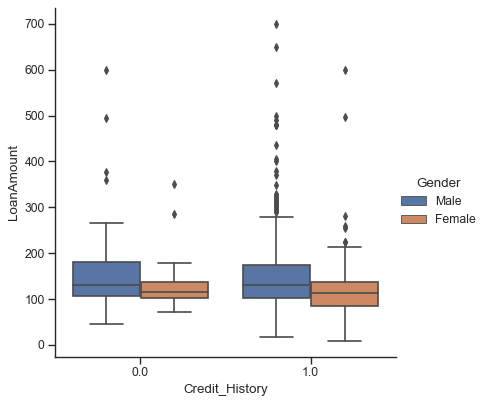

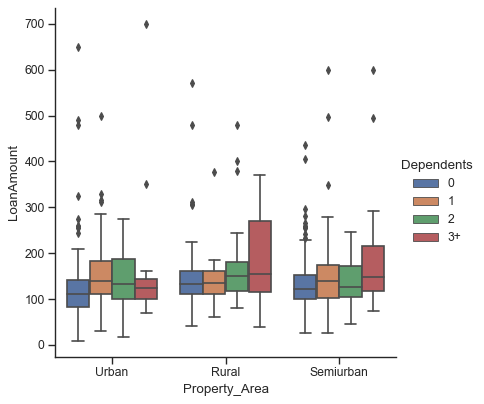

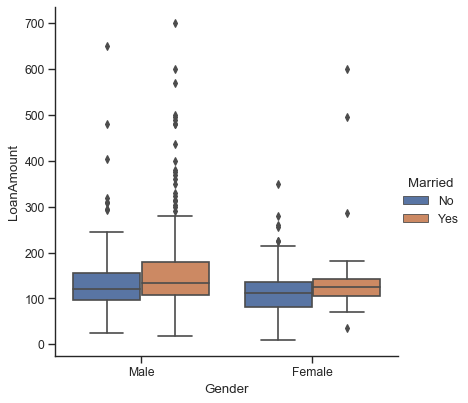

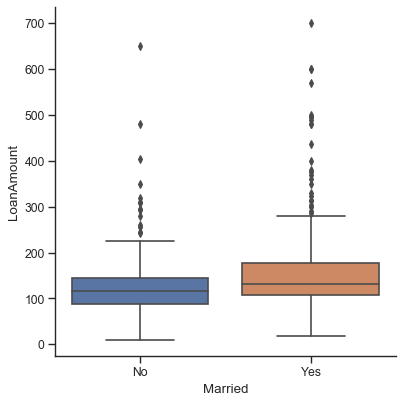

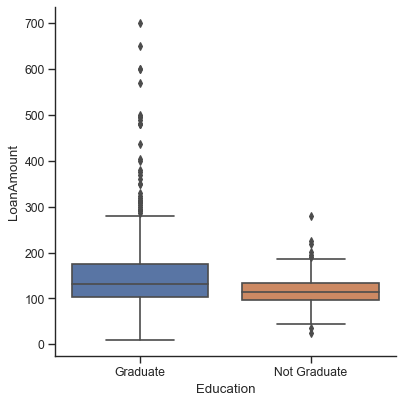

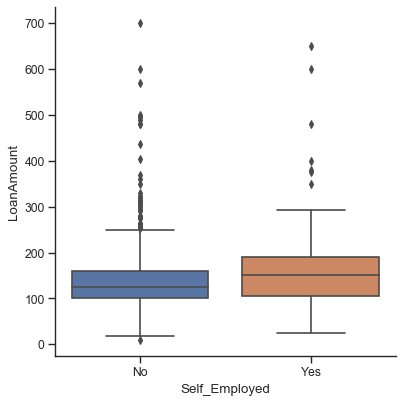

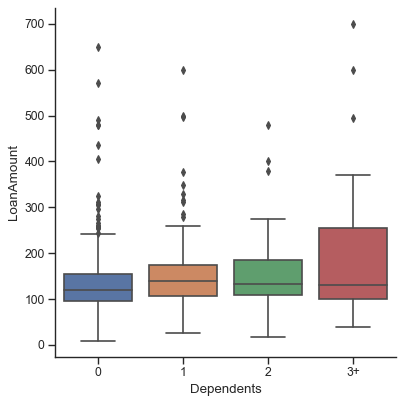

In [112]:
# Variable - LoanAmount - Identify on which other columns LoanAmount depends
# Explore LoanAmount vs categorical variables
g = sns.factorplot(y="LoanAmount",x="Credit_History",data=data,kind="box",hue="Gender")
g = sns.factorplot(y="LoanAmount",x="Property_Area",data=data,kind="box", hue="Dependents")
g = sns.factorplot(y="LoanAmount",x="Gender", data=data,kind="box",hue="Married")
g = sns.factorplot(y="LoanAmount",x="Married", data=data,kind="box")
g = sns.factorplot(y="LoanAmount",x="Education", data=data,kind="box")
g = sns.factorplot(y="LoanAmount",x="Self_Employed", data=data,kind="box")
g = sns.factorplot(y="LoanAmount",x="Dependents", data=data,kind="box")

Column - LoanAmount. LoanAmount depends upon Property_Area, gender, married, education, self employed and dependent columns. Hence we will group them by above columns and imput median values. In case if the median is null then we will impute median of the entire LoanAmount column.

In [113]:
#Impute LoanAmount for train
index_NaN_LoanAmount = list(data["LoanAmount"][data["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount :
    LoanAmount_med = data["LoanAmount"].median() # find median of entire LoanAmount column
    LoanAmount_pred = data["LoanAmount"][((data['Property_Area'] == data.iloc[i]["Property_Area"]) & (data['Gender'] == data.iloc[i]["Gender"]) & (data['Married'] == data.iloc[i]["Married"]) & (data['Education'] == data.iloc[i]["Education"]) & (data['Self_Employed'] == data.iloc[i]["Self_Employed"]) & (data['Dependents'] == data.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        data['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        data['LoanAmount'].iloc[i] = LoanAmount_med

In [114]:
#Impute Loan amount for test
index_NaN_LoanAmount_test = list(test["LoanAmount"][test["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount_test :
    LoanAmount_med = test["LoanAmount"].median()
    LoanAmount_pred = test["LoanAmount"][((test['Property_Area'] == test.iloc[i]["Property_Area"]) & (test['Gender'] == test.iloc[i]["Gender"]) & (test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        test['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        test['LoanAmount'].iloc[i] = LoanAmount_med

Check for any missing values

In [115]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [116]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Imputing missing values completed

Label encode categorical variables

In [117]:
data["Dependents"] = data["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

data["Property_Area"] = data["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

test["Dependents"] = test["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

test["Property_Area"] = test["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

Since LoanAmount is in thousands, lets multiply LoanAmount column with 1000

In [118]:
data['LoanAmount'] = data['LoanAmount'] * 1000
test['LoanAmount'] = test['LoanAmount'] * 1000

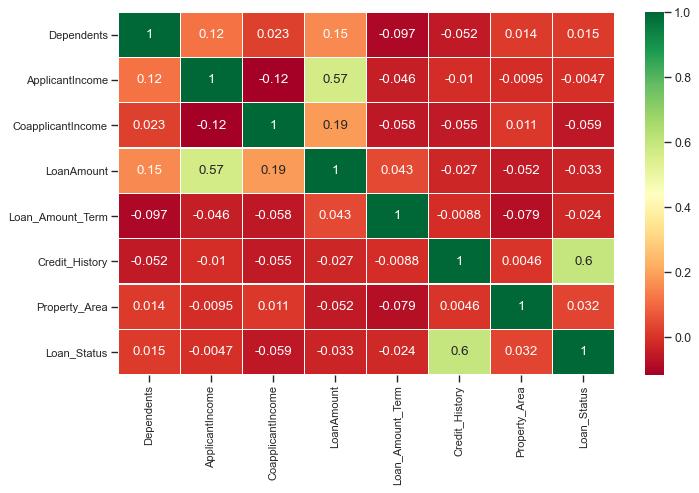

In [119]:
#Final Pair plot
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':12})
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [120]:
#Combine train and test datasets
combine_set=pd.concat([data,test], ignore_index=True)
combine_set.shape

(981, 12)

Feature Engineering - Lets add new features to our datasets

In [121]:
#Add new features - Total income
combine_set['Total_Income'] = combine_set['ApplicantIncome'] + combine_set['CoapplicantIncome']

#Dropping unwanted columns - 'ApplicantIncome','CoapplicantIncome'
combine_set.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [122]:
# Categorical variables wise sum of numerical columns
combine_set['Credit_History_Income_Sum']=combine_set.groupby(['Credit_History'])['Total_Income'].transform('sum')
combine_set['Dependents_LoanAmount_Sum']=combine_set.groupby(['Dependents'])['LoanAmount'].transform('sum')

Create a new column - EMI

In [123]:
#EMI
#Lets assume that interest rate=10.0 # hence r = ((10/12)/100) = 0.00833

r = 0.00833
combine_set['EMI']=combine_set.apply(lambda x: (x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)),axis=1)

In [124]:
# Categorical variables wise mean of EMI
combine_set['Dependents_EMI_mean']=combine_set.groupby(['Dependents'])['EMI'].transform('mean')

In [125]:
# LoanAmount_per_Total_Income
combine_set['LoanAmount_per_Total_Income']=combine_set['LoanAmount']/combine_set['Total_Income']

# Loan_Amount_Term_per_Total_Income
combine_set['Loan_Amount_Term_per_Total_Income']=combine_set['Loan_Amount_Term']/combine_set['Total_Income']

In [126]:
# EMI_per_Loan_Amount_Term
combine_set['EMI_per_Loan_Amount_Term']=combine_set['EMI']/combine_set['Loan_Amount_Term']

# EMI_per_LoanAmount
combine_set['EMI_per_LoanAmount']=combine_set['EMI']/combine_set['LoanAmount']

In [127]:
# Categorical variables wise mean of LoanAmount_per_Total_Income
combine_set['Property_Area_LoanAmount_per_Total_Income_mean']=combine_set.groupby(['Property_Area'])['LoanAmount_per_Total_Income'].transform('mean')

Bin Formation for numeric columns

In [128]:
################################# Bin formation ###############################################
from sklearn.preprocessing import KBinsDiscretizer

Loan_Amount_Term_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
combine_set['Loan_Amount_Term_Bins'] = Loan_Amount_Term_discretizer.fit_transform(combine_set['Loan_Amount_Term'].values.reshape(-1,1)).astype(float)

Total_Income_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
combine_set['Total_Income_Bins'] = Total_Income_discretizer.fit_transform(combine_set['Total_Income'].values.reshape(-1,1)).astype(float)

LoanAmount_per_Total_Income_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
combine_set['LoanAmount_per_Total_Income_Bins'] = LoanAmount_per_Total_Income_discretizer.fit_transform(combine_set['LoanAmount_per_Total_Income'].values.reshape(-1,1)).astype(float)

Feature enginneering ends

In [129]:
print("combine_set dataset shape: {0}".format(combine_set.shape))

combine_set dataset shape: (981, 23)


In [130]:
#Drop unwanted columns
combine_set=combine_set.drop(['EMI'],axis=1)
combine_set=combine_set.drop(['Total_Income'],axis=1)
combine_set=combine_set.drop(['LoanAmount_per_Total_Income'],axis=1)

In [131]:
print("combine_set dataset shape: {0}".format(combine_set.shape))

combine_set dataset shape: (981, 20)


In [132]:
#Segregate train and test
train_df=combine_set[combine_set['Loan_Status'].isnull()==False]
test_df=combine_set[combine_set['Loan_Status'].isnull()==True]

In [133]:
#Label encode categorical variables using get_dummies()
train_df = pd.get_dummies(train_df, drop_first = True)
test_df = pd.get_dummies(test_df, drop_first = True)

In [134]:
#Drop target variable from X and copy to y
X=train_df.drop(['Loan_Status'],axis=1)
y=train_df['Loan_Status']

#Drop target column (which is blank) from test dataset
X_main_test=test_df.drop(['Loan_Status'],axis=1)

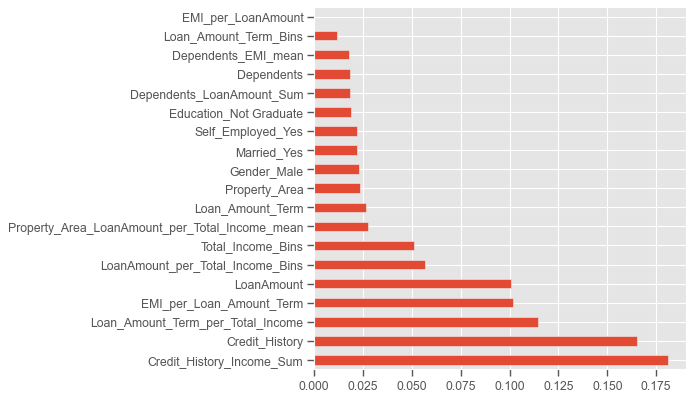

In [135]:
##### Check feature Importance #########

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) 
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

Credit_History and Credit_History_Income_Sum are the two most important features

In [136]:
#Train-test split (80:20)
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
train_x, test_x,train_y,test_y = train_test_split(X, y, test_size=0.2, random_state=2)

print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_x.shape, test_x.shape))

Train dataset shape: (491, 19), 
Test dataset shape: (123, 19)


In [137]:
### Standard scaling using StandardScaler ###
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)
X_main_test_sc =  sc.transform(X_main_test)

Model Building starts

In [138]:
#Load classifiers and accurcy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train model
clf_0 = LogisticRegression().fit(train_x, train_y)

# Predict on test set
pred_y_0 = clf_0.predict(test_x)

# How's the accuracy?
print( "Accuracy = " ,accuracy_score(pred_y_0, test_y).round(2) * 100)

Accuracy =  78.0


Evaluate Confusion Matrix

Text(128.4, 0.5, 'Predicted')

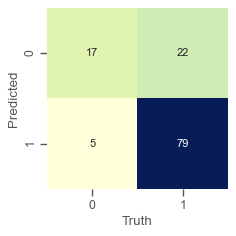

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(test_y,pred_y_0) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

Generate submission file

In [140]:
#Predict on actual test dataset for final prediction
pred_test = clf_0.predict(X_main_test_sc)

#If the predict value is > 0.5 then insert 'Y', else insert 'N'
predictions_test_final = [ 'Y' if y>=0.5 else 'N' for y in pred_test]

submission['Loan_Status'] = predictions_test_final
submission.to_csv('./submission_RP.csv',index=False)